# Portfolio Assignment week 02

This week's focus is on manifold learning and text clustering. As part of the portfolio assignment, you are required to make a contribution to either the manifold learning case or the text clustering case. There are several options for your contribution, so you can choose the one that aligns with your learning style or interests the most

### Manifold learning

Study the Tutorial tutorial_manifold_tSNE and the tutorial_manifold_spectral_clustering and the Study_Case_pipeline. Next improve the code by comparing the performance of k-means and spectral clustering. Also compare PCA and t-SNE in the visualization of the result. You can use the pipeline function of scikit-learn and hyperparameter tuning with GridSearchCV. Here's a possible approach:

- Load the dataset to be used for the clustering analysis.
- Preprocess the dataset as needed (e.g., scale the features, normalize the data, etc.).
- Define a pipeline with preprocessing and clustering
- use PCA and t-SNE for dimension reduction and visualize the dimensions, use the clusters to color the datapoints
- use GridSearchCV to optimize the hyper parameters
- Evaluate the performance of the models using a suitable metric
- choose the best cluster method and the best visualization method combination

In [1]:
import yaml
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import pairwise_distances

In [2]:
# Loading dataset
def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

In [3]:
def load_data(x):
    config = get_config()
    data = (config[x])
    df = pd.read_csv(data)
    return df

In [4]:
def explore_data(df):
    print(f'Dataframe dimensions: {df.shape}')
    datatypes = df['type'].value_counts()
    print(df['type'].value_counts())
    print(df.head())

In [5]:
def plot_density(df):
    # Get mean
    mean = df.iloc[:,2:].mean()
    mean_df = pd.DataFrame({'mean':mean})
    
    # Setting plot parameters
    sns.set(style="darkgrid")
    # Denstiy plot
    sns.kdeplot(mean_df['mean'], shade=True, color='olive')
    plt.tight_layout()
    plt.show()

In [6]:
def scatter_plot(x,y, title):
    # Set plot parameters
    df['x'] = x
    df['y'] = y
    # Plot
    sns.set(rc={"figure.figsize":(4, 4)}) 
    sns.scatterplot(x='x', y='y', hue='type', data=df, alpha=0.5, palette=['red', 'blue'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title(title)
    plt.show()

In [7]:
def data_preparation(df):
    # Transform data into the right format
    df['samples'] = df['samples'].apply(str)
    data = df.select_dtypes(include=np.number)
    
    # Normalize
    sc = StandardScaler()
    X = sc.fit_transform(data)
    
    return X

In [8]:
def pca(X, n=20):
    # Perform PCA
    pca = PCA(n_components=n)
    pc = pca.fit_transform(X)
    x,y = pc[:, 0], pc[:, 1]
    scatter_plot(x,y, "PCA")
    
    # Plot variance explained
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_ratio_, color='black')
    plt.xlabel('PCA features',fontsize=8)
    plt.ylabel('variance %',fontsize=8)
    plt.xticks(features,fontsize=8)
    plt.yticks(fontsize=8)
    plt.title("Explained variance")
    
    return pc

In [9]:
def tSNE(X, p):

    # t-SNE
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state = 42, perplexity=p)
    X_embedded = X_embedded.fit_transform(X)
    x,y = X_embedded[:, 0], X_embedded[:, 1]
    scatter_plot(x,y, "t-SNE")
    
    return X_embedded

In [ ]:
def elbow_method(X,k_max):
    
    # Finding k
    ks = range(1,k_max)
    inertias = []

    for k in ks:
        # k-means
        kmodel = KMeans(n_clusters=k, n_init=k).fit(X)
        kmodel.fit(X)
        inertias.append(np.mean(kmodel.inertia_))
        
    plt.plot(ks,inertias)
    plt.title('Elbow method')
    plt.show()

In [23]:
def kMeans(X,k,title):
    kmns = KMeans(n_clusters=2, init='k-means++',n_init=k)
    kY = kmns.fit_predict(X)

    # Plot
    plt.scatter(X[:,0], X[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
    plt.title(title)
    plt.axis('off')

In [28]:
def silhouette_analysis(data, cluster_range):
    silhouette_scores = []
    
    for n_clusters in cluster_range:
        clustering = SpectralClustering(n_clusters=n_clusters, assign_labels='discretize', random_state=0)
        labels = clustering.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        
        print("Number of clusters =", n_clusters, "   Silhouette Score =", silhouette_avg)
        
    # Extracting the optimal number of clusters
    best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
    print("\Optimal number of clusters =", best_n_clusters)

    # Plotting the silhouette scores
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Analysis")
    plt.show()

In [29]:
def spectral_clustering(X,n):
    clustering = SpectralClustering(n_clusters=n, assign_labels="discretize", random_state=0)
    clustering.fit(X)
    labels = clustering.labels_
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Spectral Clustering")
    plt.show()

**1. Load the dataset**

In [11]:
df = load_data('colorectal-cancer')

**2. Data exploration**

This dataframe contains expression values. Each column represents a specific gene, identified by a unique ID. The values in the cells indicate the expression level of the corresponding gene in the respective sample. There are 97 normal and 97 adenonocarcinoma samples. The data has a poisson distribution and should be normalsied before clustering

In [12]:
explore_data(df)

Dataframe dimensions: (194, 49388)
normal            97
adenocarcinoma    97
Name: type, dtype: int64
   samples    type  11715100_at  11715101_s_at  11715102_x_at  11715103_x_at  \
0      648  normal     4.033083       3.991328       3.522487       3.278373   
1      649  normal     3.117273       4.047258       3.042704       3.284518   
2      650  normal     3.513162       4.154993       3.067877       3.478020   
3      651  normal     3.487588       4.505968       3.688899       3.642465   
4      652  normal     3.096174       3.997803       3.404045       2.984088   

   11715104_s_at  11715105_at  11715106_x_at  11715107_s_at  ...  \
0       7.201681     2.166355       2.841044       2.217360  ...   
1       8.425413     2.139838       2.632561       2.375537  ...   
2       7.337592     2.070858       2.632643       2.542989  ...   
3       7.319168     2.191685       2.567842       2.551201  ...   
4       7.652969     2.374705       2.178836       2.852997  ...   

   AFFX-

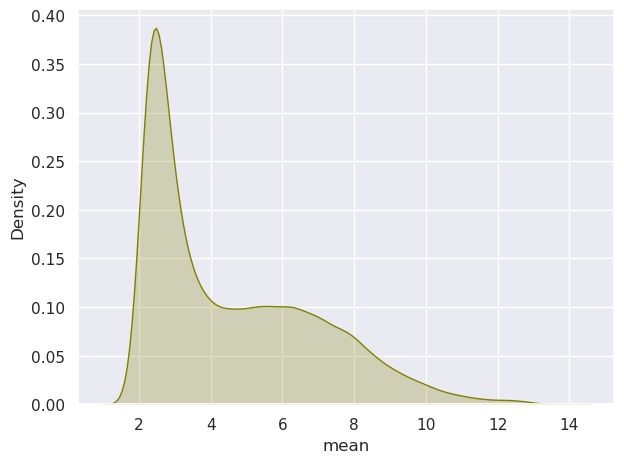

In [16]:
plot_density(df)

**3 Data preparation** 

Non-numeric columns are filtered out and the features are normalised with StandardScaler(). The StandardScaler is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance.

In [17]:
X = data_preparation(df)

After normalisation the density is plotted again. You can now see a normal distribution. 

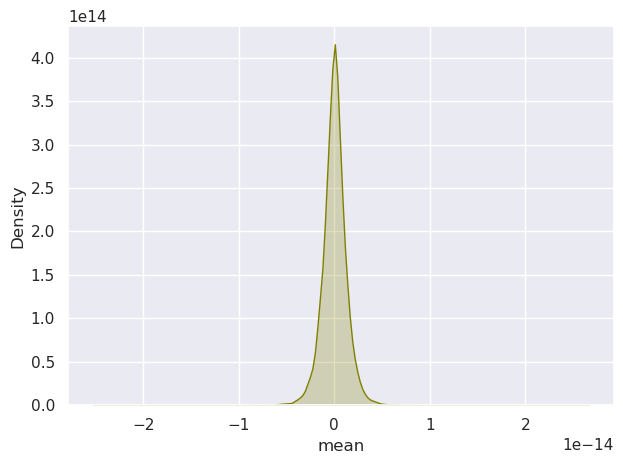

In [18]:
plot_density(pd.DataFrame(X))

**4. Dimensionality reduction**

Manifold learning is a class of unsupervised estimators that describes datasets as low-dimensional manifolds in high-dimensional spaces. The dataset is normalised before applying t-SNE and PCA dimensionality reduction. **t-SNE** and **PCA** take high dimensional data and reduce it to a low dimensional graph. PCA is a linear technique  and aims to preserve the global structure of the data while t-SNE is a non-linear technique and is aimed at preserving the local structure of the data. 

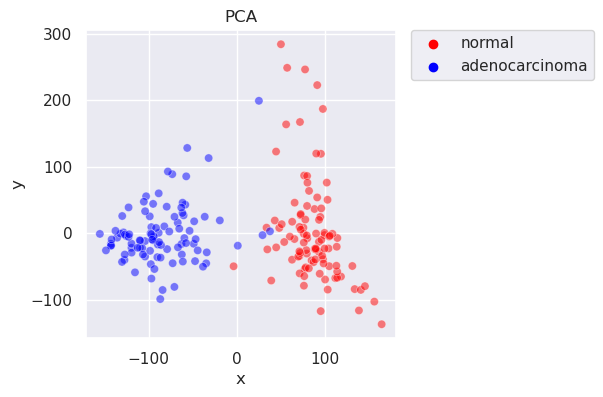

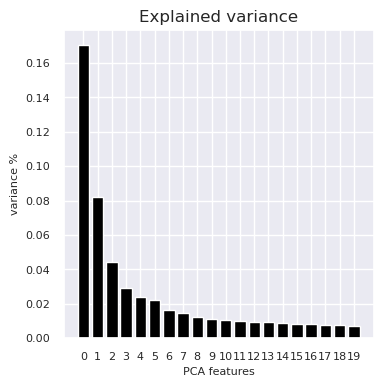

In [19]:
pc = pca(X)

Most of the variance is explaned by the first 3 clusters

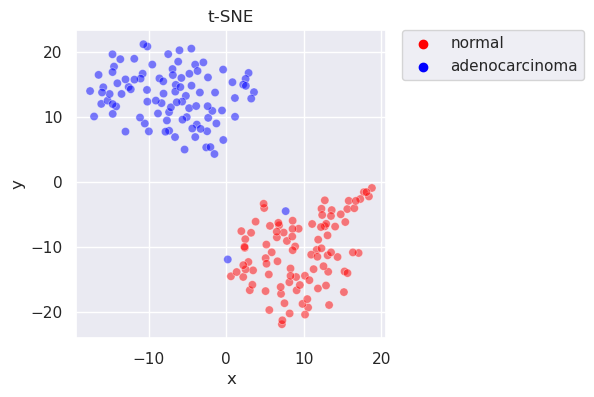

In [20]:
p = len(df)**(1/2)
X_embedded = tSNE(X,p)

Clustering is used to understand the structure of the data. It identifies subsgroups in the data such that data points in the same subgroup (cluster) are very similar and differ from data points in other clusters. 

**K-means clustering** is an iterative algorithm that aims to partition the dataset into K-pre-defined distinct non-overlapping clusters. Where each data point belongs to only one group. The steps involved are:

1. Define the number of clusters *K*. This can be done using the 'elbow-method'
2. Initialise centroids by shuffling the dataset and then randomly selecting *K* data points for the centroids
3. Keep iterating this until there is no more change in centroids

[source](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

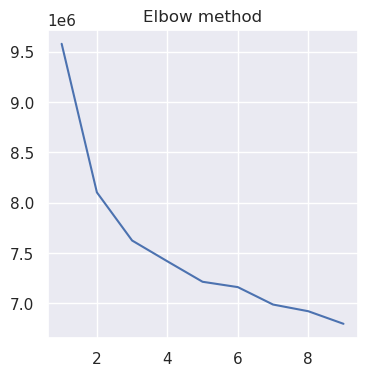

In [24]:
elbow_method(X,10)

The elbow-method doesn't clearly show whether to use two or 3 ks. For now we are moving forward with 2. 

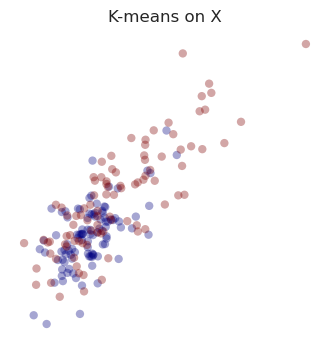

In [25]:
kMeans(X,2,'K-means on X')

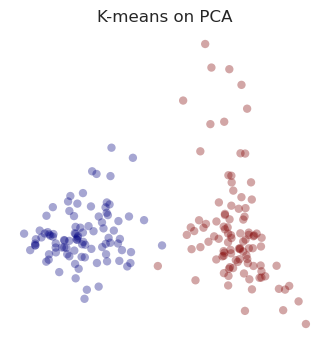

In [26]:
kMeans(pc, 2, 'K-means on PCA')

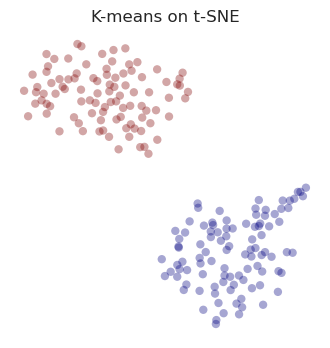

In [27]:
kMeans(X_embedded, 2, 'K-means on t-SNE')

k-means was applied to the raw, pca and t-SNE data. There are no clear clusters when looking at the raw data. The clustering of k-means on t-SNE appears to be better than the k-means on the pca. In the t-SNE plot there is a very clear distiction between the two groups.

Number of clusters = 2    Silhouette Score = 0.7039376
Number of clusters = 3    Silhouette Score = 0.48083228
Number of clusters = 4    Silhouette Score = 0.49317202
Number of clusters = 5    Silhouette Score = 0.30301535
Number of clusters = 6    Silhouette Score = 0.264994
Number of clusters = 7    Silhouette Score = 0.2404718
Number of clusters = 8    Silhouette Score = 0.18933597
Number of clusters = 9    Silhouette Score = 0.29595712
\Optimal number of clusters = 2


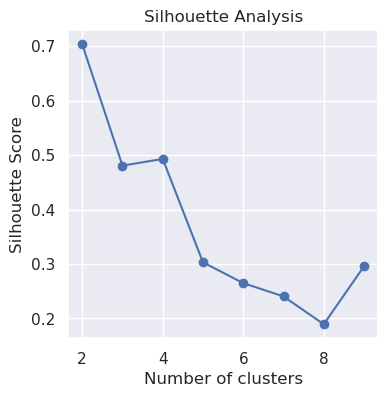

In [73]:
silhouette_analysis(X_embedded, range(2,10))

The silhouette score is a measure of how well each sample in the dataset fits within its assigned cluster compared to other clusters. Higher silhouette scores indicate better-defined and more distinct clusters. 2 has the highest silhouette score and is the most optimal cluster number

**Spectral clustering** identigies communities of nodes in a graph based on the edges connecting them. It uses information from the eigenvalues derived from the dataset. This technique can capture nonsperical clusters, unlike k-means clustering.

[source Spectral-clustering](https://towardsdatascience.com/spectral-clustering-aba2640c0d5b#:~:text=Spectral%20clustering%20is%20a%20technique,non%20graph%20data%20as%20well.)

/home/anuk-k/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


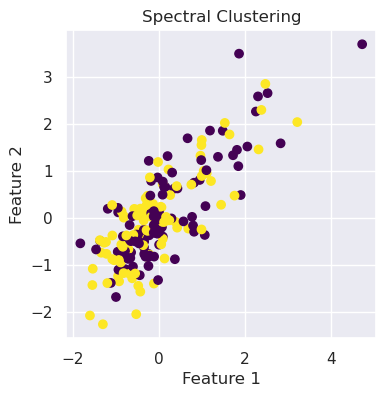

In [79]:
spectral_clustering(X,2)

/home/anuk-k/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


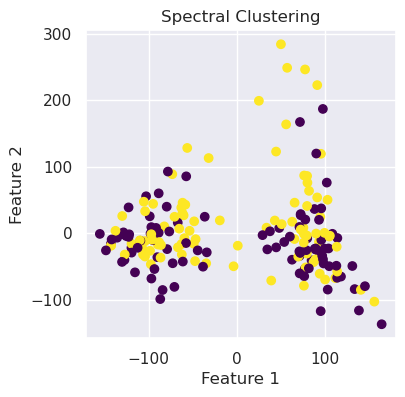

In [80]:
spectral_clustering(pc,2)

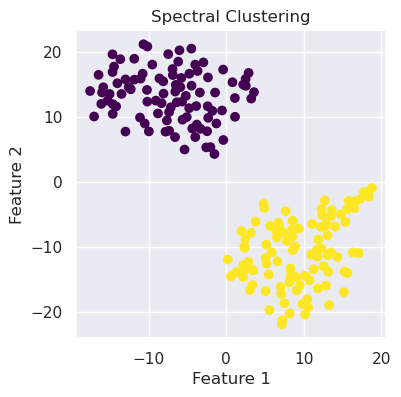

In [77]:
spectral_clustering(X_embedded,2)

When applying spectral clustering to the raw, pca and t-SNE data, the best result is on the t-SNE data. Its the only plot that demonstrates to disctint clusters accurately separated by type. 

## Optimising hyperparameters

To optimise the hyperparameters the following code performs a grid search for the K-means clustering algorithm. It sets up a parameter grid, initializes the KMeans model, defines the scoring metric, performs the grid search, and finds the best hyperparameters based on the silhouette score. As seen in the previous steps, the clustering is clearer 

In [106]:
warnings.filterwarnings("ignore")
# Optimizing hyperparameters
parameters = {'n_clusters': [2, 3, 4, 5],
              'init': ['k-means++', 'random'],
              'n_init': [10, 20, 30],
              'max_iter': [100, 200, 300]}
clustering = KMeans(random_state=0)
silhouette_scorer = make_scorer(silhouette_score)
grid_search = GridSearchCV(clustering, parameters, cv=5, scoring=silhouette_scorer)
grid_search.fit(X_embedded)

# Retrieve the best parameters and best score
print("Best Parameters for k-means: \n", grid_search.best_params_)

Best Parameters for k-means: 
 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10}


In [105]:
warnings.filterwarnings("ignore")
# Optimizing hyperparameters
distances = pairwise_distances(X_embedded)
parameters = {'n_clusters': [2, 3, 4, 5],
              'assign_labels': ['kmeans', 'discretize'],
              'gamma': [0.1, 1, 10]}
clustering = SpectralClustering(random_state=0, affinity='precomputed')
silhouette_scorer = make_scorer(silhouette_score, metric='precomputed')
grid_search = GridSearchCV(clustering, parameters, cv=5, scoring=silhouette_scorer)
grid_search.fit(distances)

# Retrieve the best parameters and best score
print("Best Parameters for spectral clustering: \n", grid_search.best_params_)

Best Parameters for spectral clustering: 
 {'assign_labels': 'kmeans', 'gamma': 0.1, 'n_clusters': 2}


(-19.389800834655762,
 20.58640651702881,
 -24.08837423324585,
 23.360184764862062)

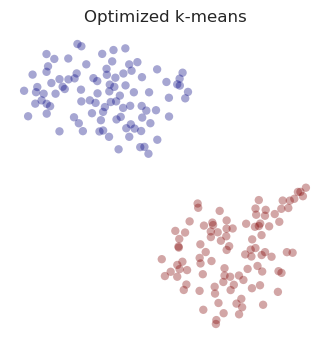

In [110]:
kmns = KMeans(n_clusters=2, init='k-means++',max_iter = 100, n_init=10)
kY = kmns.fit_predict(X_embedded)

# Plot
plt.scatter(X_embedded[:,0], X_embedded[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('Optimized k-means')
plt.axis('off')

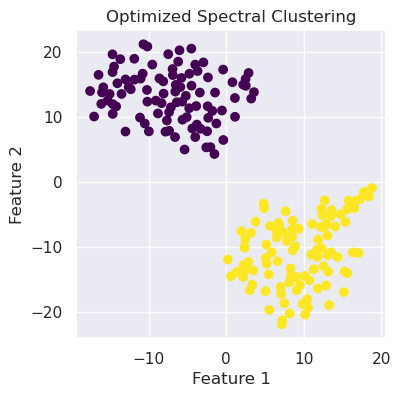

In [111]:
clustering = SpectralClustering(n_clusters=2, assign_labels="kmeans", random_state=0, gamma=0.1)
clustering.fit(X_embedded)
labels = clustering.labels_
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Optimized Spectral Clustering")
plt.show()